In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [2]:
#load the data
#from google.colab import files
#upload = files.upload()

#Load the data
df =pd.read_csv("C:/Users/Mangesh/Downloads/Data sets-20240124T042619Z-001/Data sets/NFLX.csv")
print(df.head(6))
print(df.shape)


         Date      Open      High       Low     Close  Adj Close     Volume
0  2002-05-23  1.156429  1.242857  1.145714  1.196429   1.196429  104790000
1  2002-05-24  1.214286  1.225000  1.197143  1.210000   1.210000   11104800
2  2002-05-28  1.213571  1.232143  1.157143  1.157143   1.157143    6609400
3  2002-05-29  1.164286  1.164286  1.085714  1.103571   1.103571    6757800
4  2002-05-30  1.107857  1.107857  1.071429  1.071429   1.071429   10154200
5  2002-05-31  1.078571  1.078571  1.071429  1.076429   1.076429    8464400
(4945, 7)


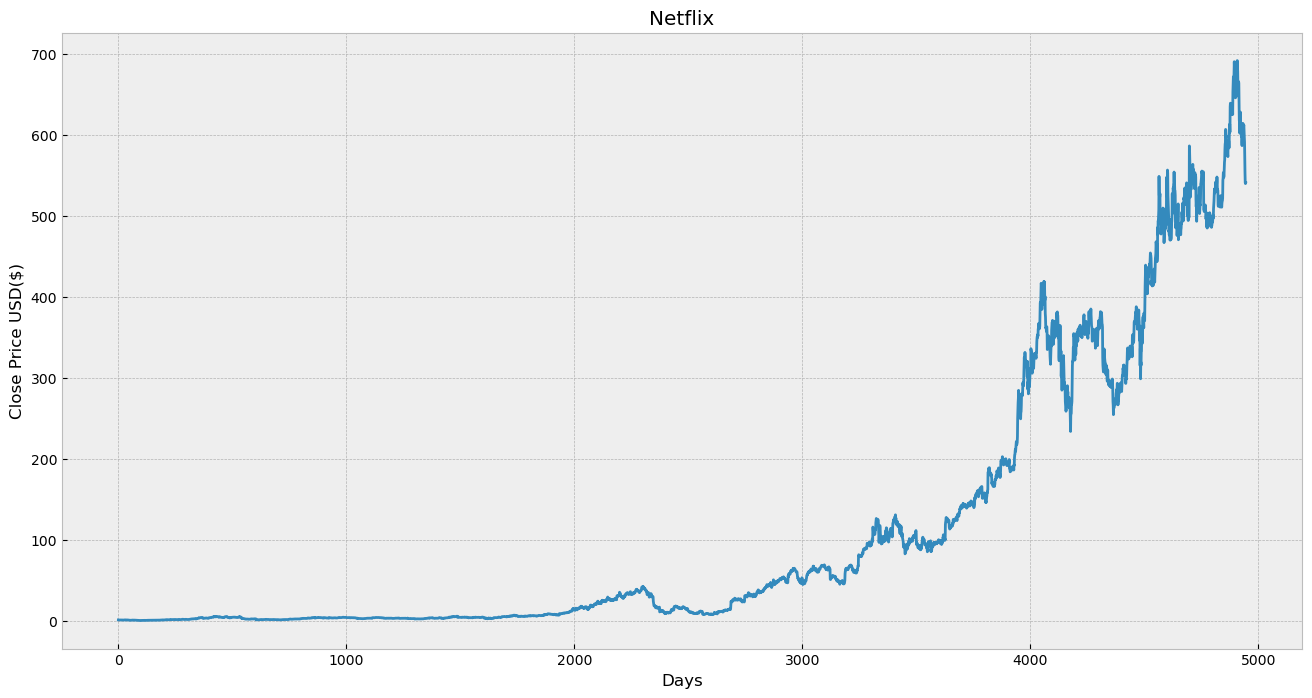

In [3]:
#visualize data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.show()



In [4]:
#get the close price
df = df[['Close']]
print(df.head(4))



      Close
0  1.196429
1  1.210000
2  1.157143
3  1.103571


In [5]:
#Creat a variable to predict 'x' days out into the future
future_days = 50



In [6]:
#Creat a new column shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
print(df.head(4))
print(df.tail(4))



      Close  Prediction
0  1.196429    0.775000
1  1.210000    0.760714
2  1.157143    0.793571
3  1.103571    0.796429
           Close  Prediction
4941  553.289978         NaN
4942  541.059998         NaN
4943  539.849976         NaN
4944  540.840027         NaN


In [7]:
#Creat future data set (x) and convert it to a numpy array and remove the last x rows/days
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(x)



[[  1.196429]
 [  1.21    ]
 [  1.157143]
 ...
 [662.919983]
 [674.049988]
 [690.309998]]


C:\Users\Mangesh\AppData\Local\Temp\ipykernel_21900\1168754343.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(['Prediction'], 1))[:-future_days]


In [8]:
#Creat the target data set
y = np.array(df['Prediction'])[:-future_days]
print(y)



[  0.775      0.760714   0.793571 ... 541.059998 539.849976 540.840027]


In [9]:
#split data into 75% training and 25% data testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)



In [10]:
#Creat decission tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)



In [11]:
#Creat the linear regression model
lr = LinearRegression().fit(x_train, y_train)



In [12]:
#Get the last 'x' row of the future data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
print(x_future)



[[546.880005]
 [553.330017]
 [553.409973]
 [547.580017]
 [550.119995]
 [558.919983]
 [566.179993]
 [569.190002]
 [582.070007]
 [588.549988]
 [590.530029]
 [606.710022]
 [606.049988]
 [597.539978]
 [598.719971]
 [589.289978]
 [577.76001 ]
 [582.869995]
 [586.5     ]
 [589.349976]
 [575.429993]
 [573.140015]
 [590.650024]
 [593.26001 ]
 [592.390015]
 [592.640015]
 [583.849976]
 [599.059998]
 [610.340027]
 [613.150024]
 [603.349976]
 [634.809998]
 [639.099976]
 [631.849976]
 [632.659973]
 [627.039978]
 [624.940002]
 [629.76001 ]
 [633.799988]
 [628.289978]
 [637.969971]
 [639.      ]
 [625.140015]
 [653.159973]
 [664.780029]
 [671.659973]
 [668.52002 ]
 [662.919983]
 [674.049988]
 [690.309998]]


C:\Users\Mangesh\AppData\Local\Temp\ipykernel_21900\2474000056.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Prediction'], 1)[:-future_days]


In [13]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print ()



[681.169983 593.919983 593.919983 668.400024 645.719971 651.450012
 544.530029 646.909973 657.580017 682.609985 679.330017 687.400024
 691.690002 682.02002  678.799988 659.200012 654.059998 657.580017
 665.640015 663.840027 641.900024 617.77002  616.469971 602.130005
 612.690002 625.580017 657.580017 678.799988 611.659973 604.559998
 597.98999  613.119995 612.090027 586.72998  593.73999  604.919983
 614.23999  614.090027 613.119995 604.919983 612.090027 612.090027
 602.440002 597.369995 591.150024 567.52002  553.289978 541.059998
 539.849976 540.840027]



In [14]:
#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)



[569.3957307  576.08087686 576.16374765 570.12126153 572.75383402
 581.87462419 589.3992967  592.51903509 605.86857863 612.58478631
 614.63700938 631.40684146 630.72274602 621.90250496 623.12551442
 613.35175252 601.40146137 606.69773006 610.46006632 613.41393774
 598.98650397 596.61304519 614.76137878 617.46651141 616.56480088
 616.82391459 607.71343612 623.47793705 635.16917771 638.0816127
 627.92430551 660.53119761 664.97756608 657.46326848 658.30279379
 652.47792277 650.30139248 655.2971131  659.48436786 653.77349132
 663.80636692 664.87394547 650.50869692 679.55011803 691.59378132
 698.72453259 695.4701131  689.66592764 701.2016752  718.05444128]


C:\Users\Mangesh\AppData\Local\Temp\ipykernel_21900\4117257950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Predictions


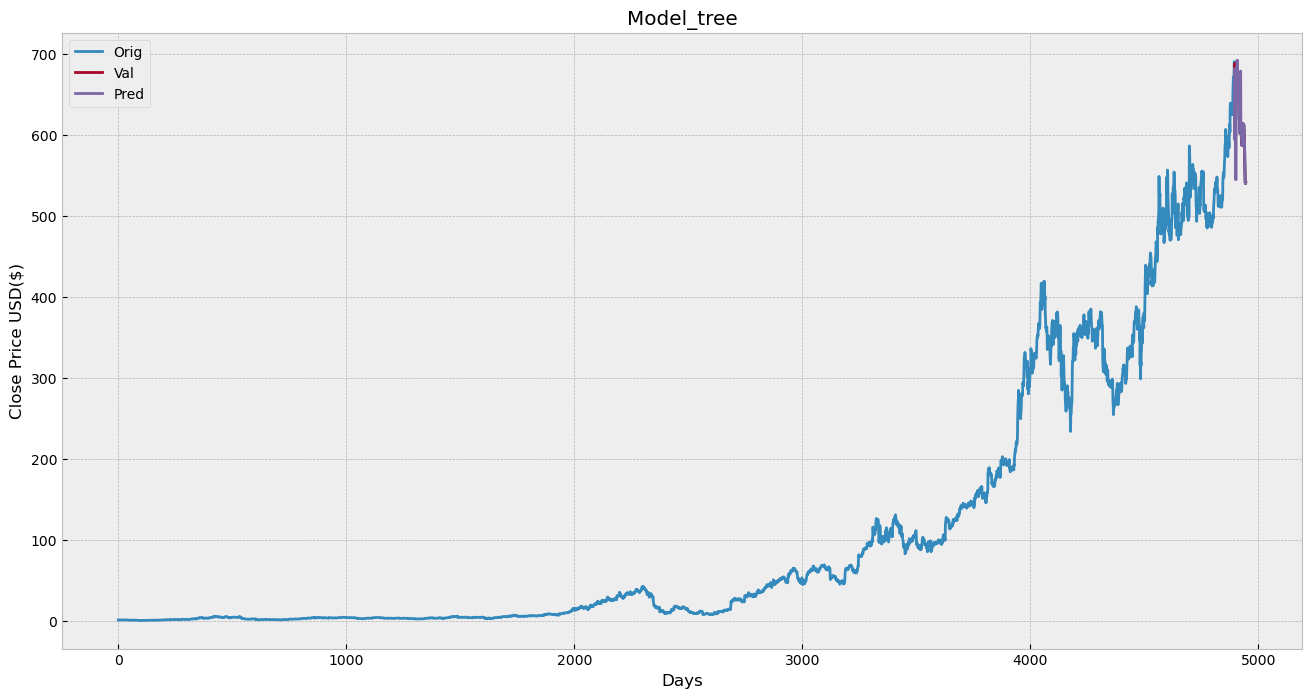

In [15]:
#visualize data
Predictions = tree_prediction
valid = df[x.shape[0]:]
valid['Prediction'] = Predictions
plt.figure(figsize=(16,8))
plt.title('Model_tree')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()



C:\Users\Mangesh\AppData\Local\Temp\ipykernel_21900\3854817000.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Predictions


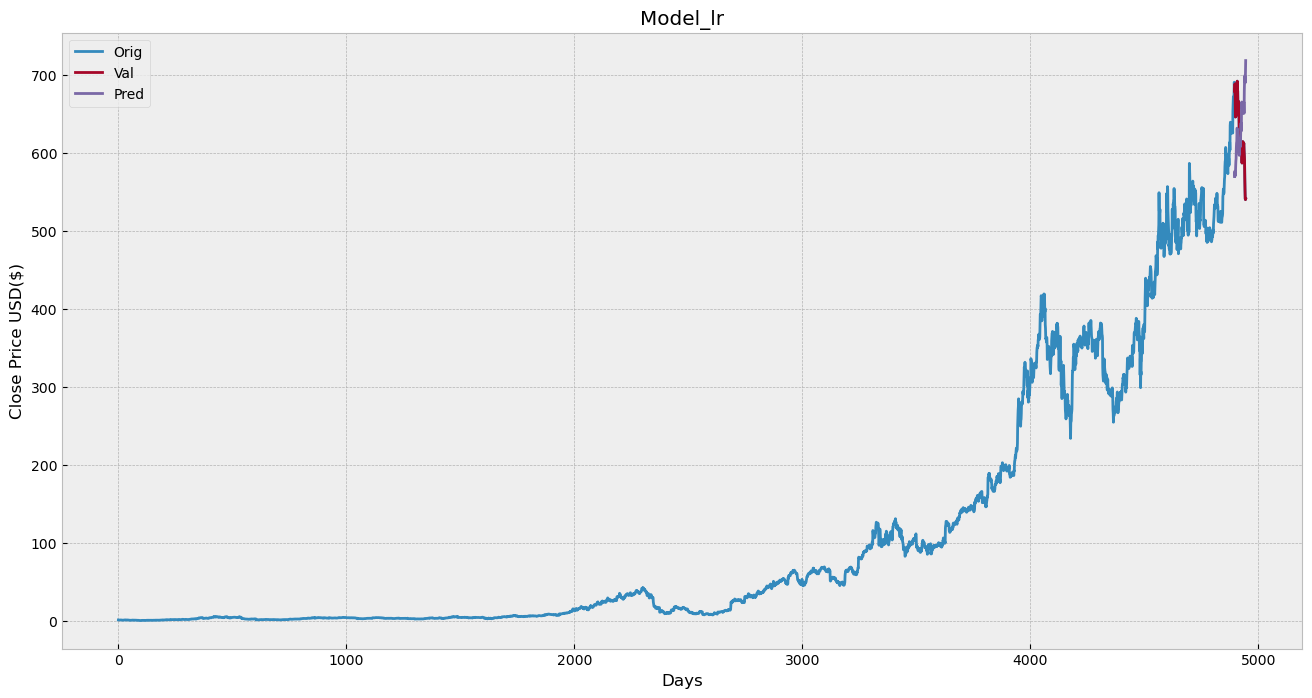

In [16]:
#visualize data
Predictions = lr_prediction
valid = df[x.shape[0]:]
valid['Prediction'] = Predictions
plt.figure(figsize=(16,8))
plt.title('Model_lr')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()
